In [1]:
import scvelo as scv
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
top_dir = "/home/owenwhitley/projects/su2c_v2"
preproc_dir = os.path.join(top_dir, 'data/preprocessed/scRNA/velocyto_GBM_GSCs_split_by_sample_no_G800_L')
loom_file = os.path.join(preproc_dir, 'GSCs_GBM_combined_PCA_full.loom')

In [3]:
scv.logging.print_version()
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
# scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

Running scvelo 0.2.2 (python 3.8.5) on 2020-09-02 11:07.


In [4]:
adata = scv.read(loom_file, cache=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'Pathology' as categorical
... storing 'PatientID' as categorical
... storing 'Phase' as categorical
... storing 'SampleID' as categorical
... storing 'SampleType' as categorical
... storing 'Stage' as categorical
... storing 'culture_cond' as categorical
... storing 'orig.ident' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


In [5]:
adata.var_names_make_unique()

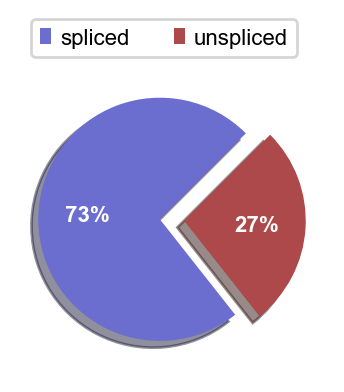

In [6]:
scv.pl.proportions(adata)

In [7]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 45100 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.


In [8]:
scv.tl.velocity(adata)

computing neighbors
    finished (0:00:36) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:07) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:19) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [9]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:04:55) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [10]:
adata.obs

CC.Difference  Dev_IR_Diff  Dev_IR_Diff_zscore  \
G885_L_AACTTTCGTTTACTCT        -1.298991    -0.026460            0.751616   
G885_L_ACGGGCTTCGCATGGC         0.107053    -0.055320            0.430399   
G885_L_AAGGCAGCATAGTAAG        -2.806628    -0.052000            0.467352   
G885_L_ACAGCCGCACGTCAGC        -1.114961    -0.046012            0.533996   
G885_L_ACATCAGTCCTGTAGA        -2.340430    -0.013791            0.892618   
...                                  ...          ...                 ...   
G945-I_L_TTTGTCAGTTCGCTAA      -0.058708    -0.243437           -1.663337   
G945-I_L_TTTGCGCCATGTCGAT      -1.648159    -0.189149           -1.059115   
G945-I_L_TTTGTCAAGGATGTAT      -0.700495    -0.147292           -0.593249   
G945-I_L_TTTGGTTGTTCGAATC      -0.332038    -0.174721           -0.898523   
G945-I_L_TTTGGTTGTTTGGGCC      -0.487547    -0.171226           -0.859633   

                           G2M.Score       PC1       PC2  \
G885_L_AACTTTCGTTTACTCT     0.329201 -2.523361 -0.811528   
G885_L_ACGGGCTTCGCATGGC     0.998918 -1.739273 -0.670789   
G885_L_AAGGCAGCATAGTAAG    -2.304645 -1.783380 -1.978023   
G885_L_ACAGCCGCACGTCAGC    -1.028938 -3.208143 -1.601845   
G885_L_ACATCAGTCCTGTAGA    -1.480048 -2.300764 -1.088437   
...                              ...       ...       ...   
G945-I_L_TTTGTCAGTTCGCTAA  -0.086897 -6.307746  4.202398   
G945-I_L_TTTGCGCCATGTCGAT  -1.487241 -8.341479  5.278838   
G945-I_L_TTTGTCAAGGATGTAT  -0.018592 -5.836099  4.260592   
G945-I_L_TTTGGTTGTTCGAATC  -0.199553 -8.263976  6.100361   
G945-I_L_TTTGGTTGTTTGGGCC  -0.544239 -8.425301  5.090435   

                                         Pathology PatientID Phase  \
G885_L_AACTTTCGTTTACTCT    GLIOBLASTOMA (GRADE IV)      G885     S   
G885_L_ACGGGCTTCGCATGGC    GLIOBLASTOMA (GRADE IV)      G885   G2M   
G885_L_AAGGCAGCATAGTAAG    GLIOBLASTOMA (GRADE IV)      G885     S   
G885_L_ACAGCCGCACGTCAGC    GLIOBLASTOMA (GRADE IV)      G885     S   
G885_L_ACATCAGTCCTGTAGA    GLIOBLASTOMA (GRADE IV)      G885     S   
...                                            ...       ...   ...   
G945-I_L_TTTGTCAGTTCGCTAA  GLIOBLASTOMA (GRADE IV)      G945    G1   
G945-I_L_TTTGCGCCATGTCGAT  GLIOBLASTOMA (GRADE IV)      G945     S   
G945-I_L_TTTGTCAAGGATGTAT  GLIOBLASTOMA (GRADE IV)      G945     S   
G945-I_L_TTTGGTTGTTCGAATC  GLIOBLASTOMA (GRADE IV)      G945     S   
G945-I_L_TTTGGTTGTTTGGGCC  GLIOBLASTOMA (GRADE IV)      G945    G1   

                           RNA.GSC.c1_AUC  ...  nowakowski_tRG_upreg_AUC  \
G885_L_AACTTTCGTTTACTCT          0.114691  ...                  0.169913   
G885_L_ACGGGCTTCGCATGGC          0.107703  ...                  0.175428   
G885_L_AAGGCAGCATAGTAAG          0.112514  ...                  0.181370   
G885_L_ACAGCCGCACGTCAGC          0.120143  ...                  0.185287   
G885_L_ACATCAGTCCTGTAGA          0.131414  ...                  0.172795   
...                                   ...  ...                       ...   
G945-I_L_TTTGTCAGTTCGCTAA        0.053546  ...                  0.200536   
G945-I_L_TTTGCGCCATGTCGAT        0.055848  ...                  0.153895   
G945-I_L_TTTGTCAAGGATGTAT        0.066986  ...                  0.148316   
G945-I_L_TTTGGTTGTTCGAATC        0.082931  ...                  0.138489   
G945-I_L_TTTGGTTGTTTGGGCC        0.059232  ...                  0.142508   

                           nowakowski_vRG_upreg_AUC orig.ident percent.mito  \
G885_L_AACTTTCGTTTACTCT                    0.086858       G885     0.066769   
G885_L_ACGGGCTTCGCATGGC                    0.087842       G885     0.063655   
G885_L_AAGGCAGCATAGTAAG                    0.093148       G885     0.054708   
G885_L_ACAGCCGCACGTCAGC                    0.092171       G885     0.044165   
G885_L_ACATCAGTCCTGTAGA                    0.097119       G885     0.069630   
...                                             ...        ...          ...   
G945-I_L_TTTGTCAGTTCGCTAA                  0.063086     G945-I     0.19069

In [11]:
PCA_coords = adata.obs.loc[:, ['PC1', 'PC2']].to_numpy()

In [12]:
adata.obs.keys()

Index(['CC.Difference', 'Dev_IR_Diff', 'Dev_IR_Diff_zscore', 'G2M.Score',
       'PC1', 'PC2', 'Pathology', 'PatientID', 'Phase', 'RNA.GSC.c1_AUC',
       ...
       'nowakowski_tRG_upreg_AUC', 'nowakowski_vRG_upreg_AUC', 'orig.ident',
       'percent.mito', 'unique_id', 'initial_size_spliced',
       'initial_size_unspliced', 'initial_size', 'n_counts',
       'velocity_self_transition'],
      dtype='object', length=129)

In [13]:
adata.obsm['pca'] = PCA_coords

Renamed 'dm' to convention 'X_dm' (adata.obsm).
computing velocity embedding
    finished (0:00:23) --> added
    'velocity_dm', embedded velocity vectors (adata.obsm)


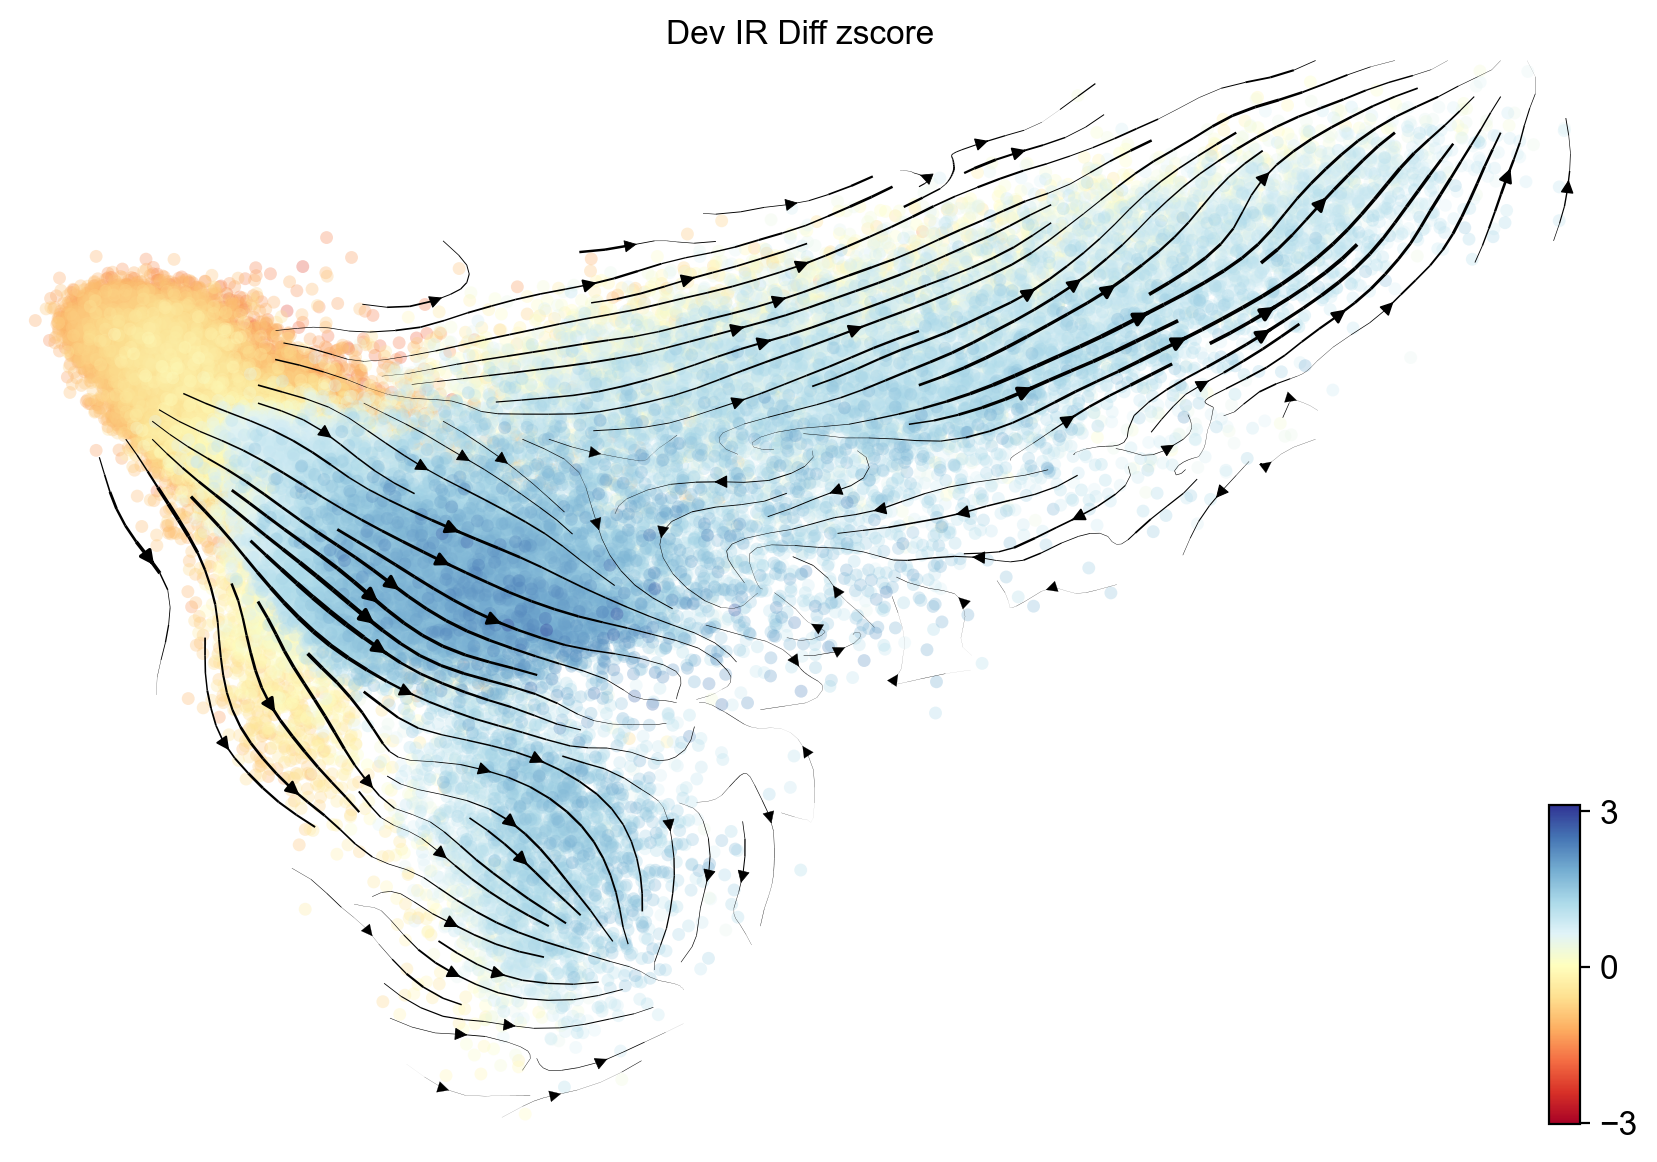

In [14]:
scv.pl.velocity_embedding_stream(adata, basis = 'pca', color = 'Dev_IR_Diff_zscore', figsize = (10, 7),
                                color_map = cm.RdYlBu)

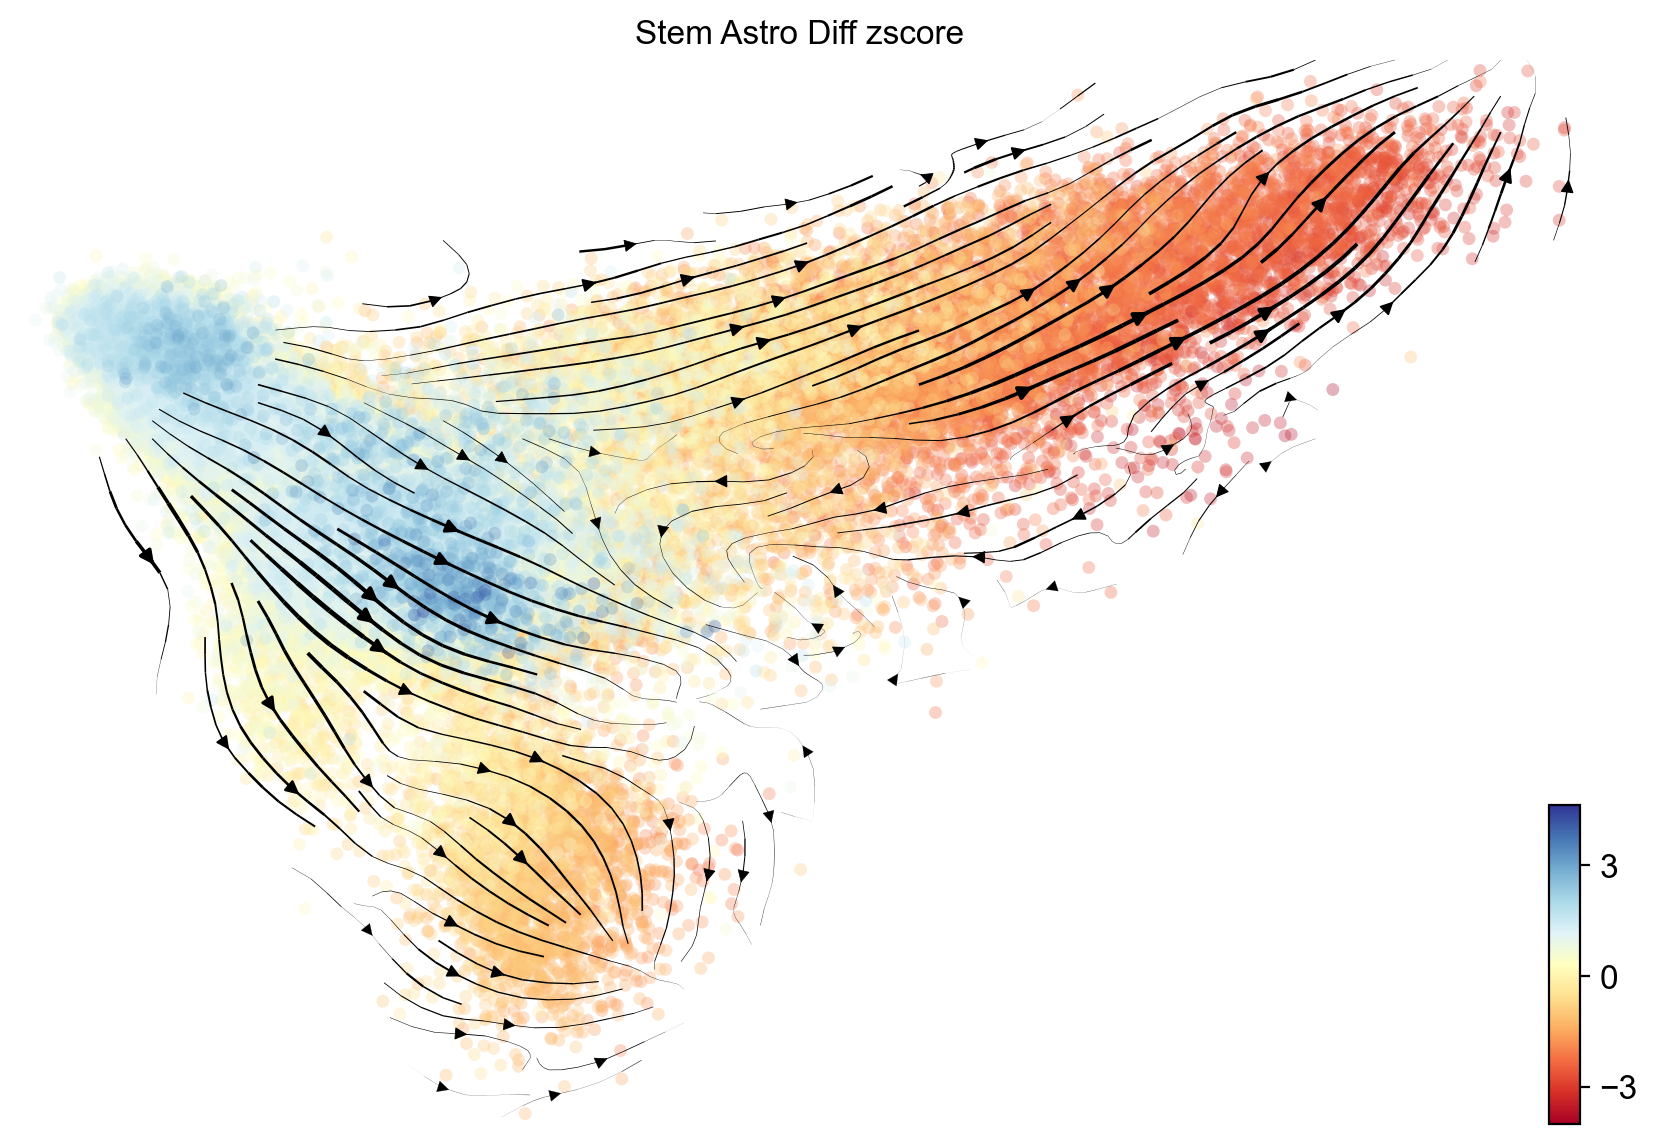

In [15]:
scv.pl.velocity_embedding_stream(adata, basis = 'pca', color = 'Stem_Astro_Diff_zscore', figsize = (10, 7),
                                color_map = cm.RdYlBu)

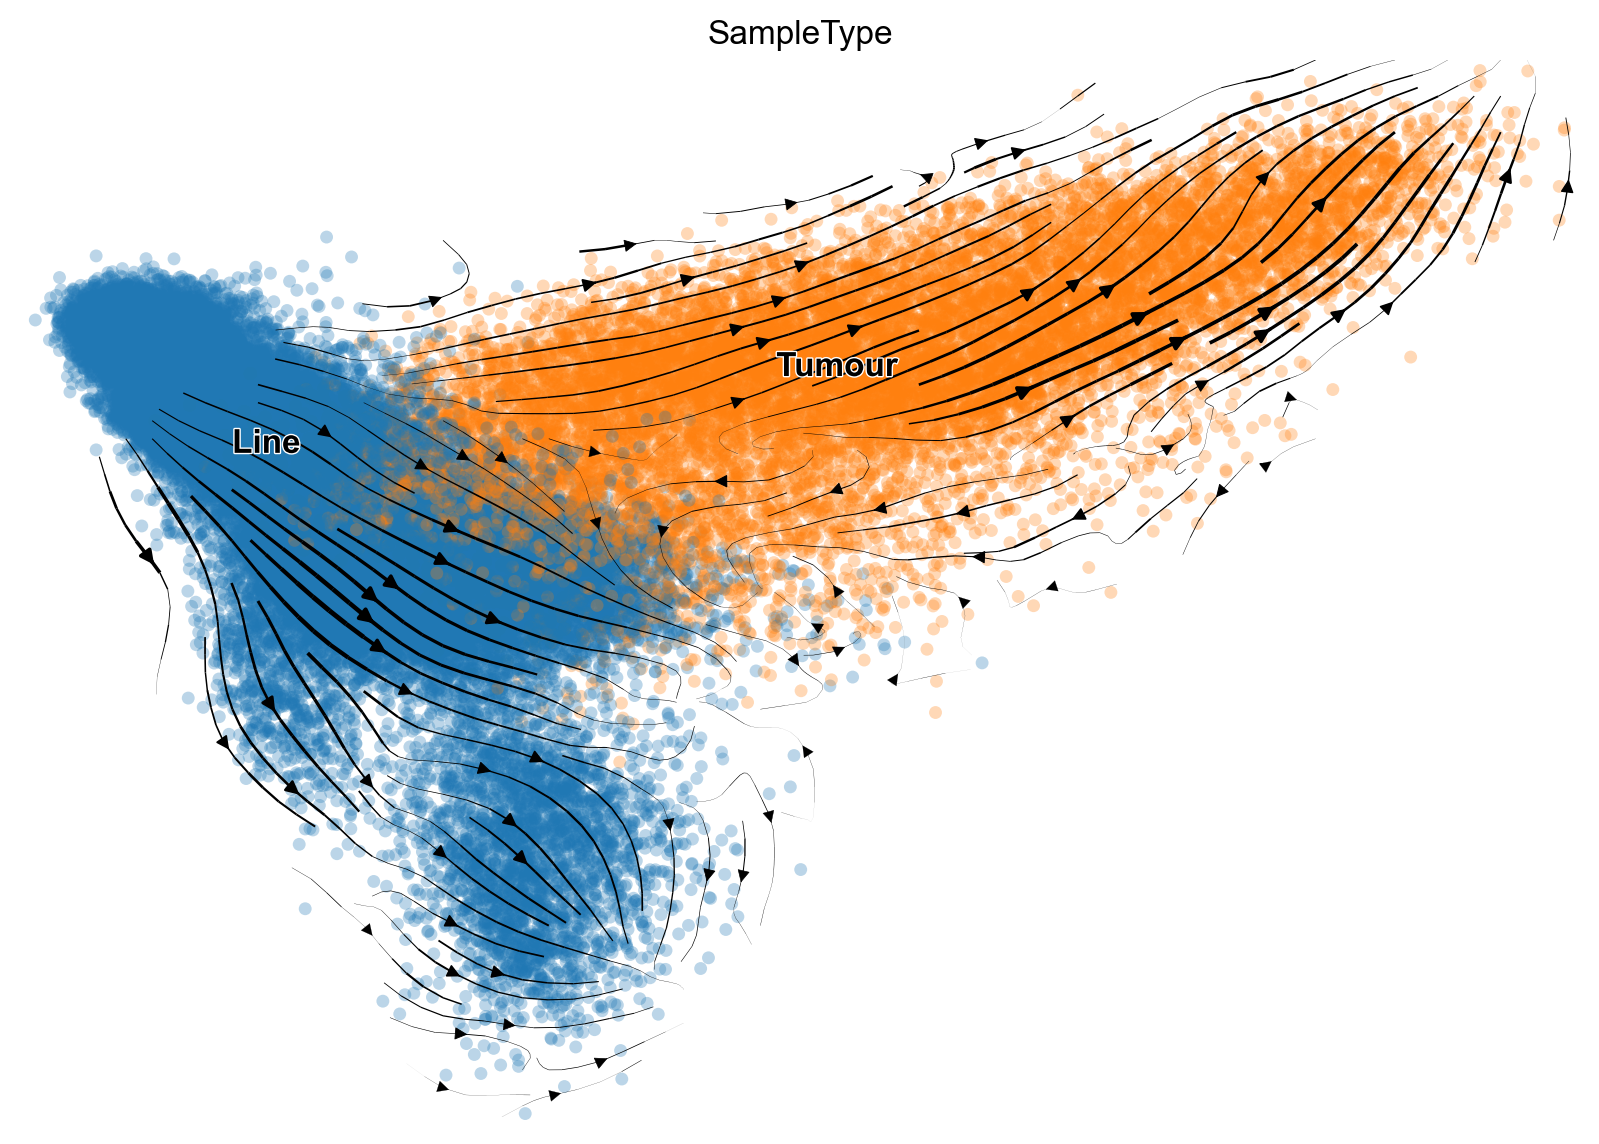

In [16]:
scv.pl.velocity_embedding_stream(adata, basis = 'pca', color = 'SampleType', figsize = (10, 7))